## Net Present Value (NPV) of the fund

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [9]:
def calculate_npv(initial_balance, net_cash_flow, rate, years):
    pv_cash_flows = sum(net_cash_flow / (1 + rate)**t for t in range(1, years + 1))
    terminal_value = initial_balance + net_cash_flow * years
    pv_terminal = terminal_value / (1 + rate)**years
    return pv_cash_flows + pv_terminal

Imagine that there are no incomes and outcomes to/from the Fund. Now we can measure the influence of the discount rate to the Fund

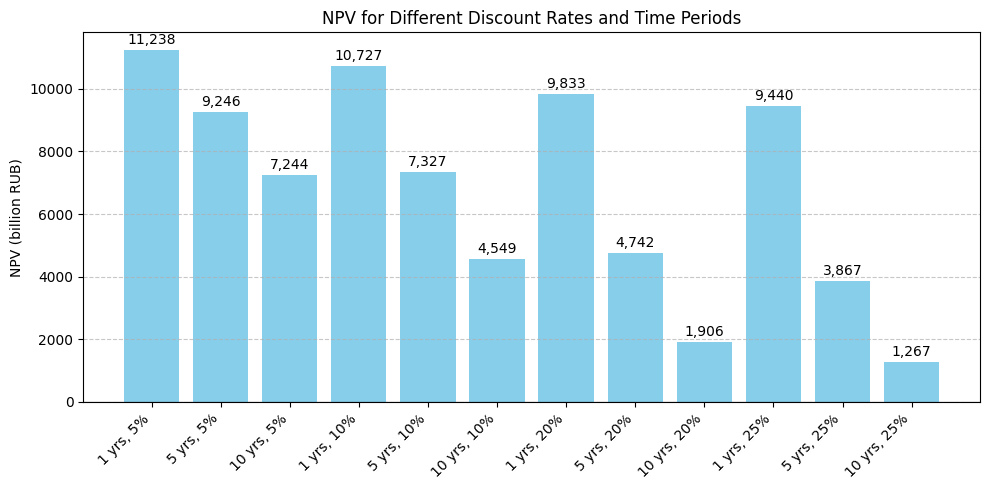

In [12]:
# Given data
initial_balance = 11800 # billion RUB on 01-03-2025
average_inflow = 0    # billion RUB/year
average_outflow = 0  # billion RUB/year
net_cash_flow = average_inflow - average_outflow

discount_rates = [0.05, 0.10, 0.20, 0.25]
time_periods = [1, 5, 10]

# Compute NPVs
results = {}
for rate in discount_rates:
    for years in time_periods:
        npv = calculate_npv(initial_balance, net_cash_flow, rate, years)
        results[(years, rate)] = npv

# Prepare data for visualization
labels = [f"{years} yrs, {int(rate*100)}%" for years, rate in results.keys()]
values = list(results.values())

# Plot
plt.figure(figsize=(10, 5))
x = np.arange(len(labels))
plt.bar(x, values, color='skyblue')
plt.xticks(x, labels, rotation=45, ha='right')
plt.ylabel("NPV (billion RUB)")
plt.title("NPV for Different Discount Rates and Time Periods")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.8)

# Show values on bars
for i, v in enumerate(values):
    plt.text(i, v + 200, f"{v:,.0f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()